# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [32]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load data
train_file = 'stsa-train.txt'
test_file = 'stsa-test.txt'

train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)

test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)

# Data processing
nltk.download('stopwords')
nltk.download('wordnet')
stopword = stopwords.words('english')

wl = WordNetLemmatizer()
train_data['clean_reviews'] = train_data['reviews'].apply(lambda review: "".join([word.lower() for word in review if word not in string.punctuation]))
train_data['clean_reviews'] = train_data['clean_reviews'].apply(lambda review: re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review))
train_data['clean_reviews'] = train_data['clean_reviews'].apply(lambda review: ' '.join([wl.lemmatize(word) for word in re.split('\W+', review) if word not in stopword]))

test_data['clean_reviews'] = test_data['reviews'].apply(lambda review: "".join([word.lower() for word in review if word not in string.punctuation]))
test_data['clean_reviews'] = test_data['clean_reviews'].apply(lambda review: re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review))
test_data['clean_reviews'] = test_data['clean_reviews'].apply(lambda review: ' '.join([wl.lemmatize(word) for word in re.split('\W+', review) if word not in stopword]))

label_encoder = LabelEncoder()
train_data['sentiment'] = label_encoder.fit_transform(train_data['sentiment'])
test_data['sentiment'] = label_encoder.transform(test_data['sentiment'])

# TF-IDF vectorization
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(train_data['clean_reviews'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

X_test_tfidf = tfidf_vect.transform(test_data['clean_reviews'])

# Models
models = [
    MultinomialNB(fit_prior=False),
    LinearSVC(),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

# Model Evaluation
for model in models:
    model.fit(X_tfidf_df, train_data['sentiment'])
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(test_data['sentiment'], y_pred) * 100
    print('Accuracy: {:.4f}%'.format(accuracy))
    print(classification_report(test_data['sentiment'], y_pred))

    scores = cross_val_score(model, X_test_tfidf, test_data['sentiment'], cv=10)
    print("Cross-Validation Mean Score: {:.2f}%".format(scores.mean() * 100))
    print("\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Accuracy: 81.1093%
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       912
           1       0.78      0.86      0.82       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821

Cross-Validation Mean Score: 72.49%




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Accuracy: 79.6266%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score: 70.84%




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 49.7529%
              precision    recall  f1-score   support

           0       0.50      0.71      0.58       912
           1       0.49      0.29      0.37       909

    accuracy                           0.50      1821
   macro avg       0.50      0.50      0.47      1821
weighted avg       0.50      0.50      0.47      1821

Cross-Validation Mean Score: 52.61%




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 67.0511%
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       912
           1       0.68      0.64      0.66       909

    accuracy                           0.67      1821
   macro avg       0.67      0.67      0.67      1821
weighted avg       0.67      0.67      0.67      1821

Cross-Validation Mean Score: 62.99%




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 75.3432%
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       912
           1       0.76      0.74      0.75       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Cross-Validation Mean Score: 65.95%


Accuracy: 50.0824%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.00      0.00      0.00       909

    accuracy                           0.50      1821
   macro avg       0.25      0.50      0.33      1821
weighted avg       0.25      0.50      0.33      1821



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Mean Score: 65.19%




In [33]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize text for Word2Vec
train_data['tokens'] = train_data['clean_reviews'].apply(lambda x: x.split())
test_data['tokens'] = test_data['clean_reviews'].apply(lambda x: x.split())

# Train a Word2Vec model
print("Training Word2Vec model...")
model_w2v = Word2Vec(sentences=train_data['tokens'], vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec model trained.")

# Generate averaged word vector features
def document_vector(doc):
    doc = [word for word in doc if word in model_w2v.wv.index_to_key]
    return np.mean(model_w2v.wv[doc], axis=0) if doc else np.zeros((100,))

print("Transforming training data...")
X_train_w2v = np.array([document_vector(doc) for doc in train_data['tokens']])
print("Training data transformed.")

print("Transforming testing data...")
X_test_w2v = np.array([document_vector(doc) for doc in test_data['tokens']])
print("Testing data transformed.")

print(f"Shape of Word2Vec training data: {X_train_w2v.shape}")
print(f"Shape of Word2Vec testing data: {X_test_w2v.shape}")


Training Word2Vec model...
Word2Vec model trained.
Transforming training data...
Training data transformed.
Transforming testing data...
Testing data transformed.
Shape of Word2Vec training data: (6920, 100)
Shape of Word2Vec testing data: (1821, 100)


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd



# Assuming 'clean_reviews' is a column after preprocessing the text data
# Sample a smaller number of reviews for demonstration purposes
sample_size = 100  # Adjust this number based on your needs and computational capability
train_sample = train_data['clean_reviews'].sample(n=sample_size, random_state=42)
test_sample = test_data['clean_reviews'].sample(n=sample_size, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')
print("Loaded BERT model.")

# Function to encode text into BERT embeddings
def bert_encode(text):
    print(f"Encoding text: {text[:30]}...")  # Print the first 30 characters of text being encoded
    encoded = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,  # Max length for BERT
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',  # Return PyTorch tensors
    )
    with torch.no_grad():
        output = model_bert(**{key: val.to(model_bert.device) for key, val in encoded.items()})
    return output.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

print("Transforming training data using BERT...")
X_train_bert = np.array([bert_encode(text) for text in train_sample])
print("Training data transformed using BERT.")

print("Transforming testing data using BERT...")
X_test_bert = np.array([bert_encode(text) for text in test_sample])
print("Testing data transformed using BERT.")

print(f"Shape of BERT training data: {X_train_bert.shape}")
print(f"Shape of BERT testing data: {X_test_bert.shape}")


Loaded BERT model.
Transforming training data using BERT...
Encoding text:  overly melodramatic ...
Encoding text: lrb westbrook rrb make wonderf...
Encoding text: mama africa pretty much delive...
Encoding text: sad nonsense ...
Encoding text: easily thoughtful fictional ex...
Encoding text:  tara reid play college journa...
Encoding text: classy sprightly spin film ...
Encoding text: hardly film come along every d...
Encoding text: watching film one left inescap...
Encoding text: alabama manages pleasant spite...
Encoding text: tired predictable bordering of...
Encoding text: conceptually brilliant play li...
Encoding text: tell fascinating compelling st...
Encoding text: rollerball bad think worse ima...
Encoding text: writerdirector david caesar la...
Encoding text: wilco phenomenal band engrossi...
Encoding text: merely indulges worst element ...
Encoding text: dialogue choppy monosyllabic d...
Encoding text: great way spend unit day ...
Encoding text: make realize deep inside rig

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [1]:
# importing the libraries
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
data_df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
data_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [8]:
#datashape
print("Shape: {0}".format(data_df.shape))
#printing cluster data
cluster_df = data_df.head(1000)
cluster_df

Shape: (413840, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0


In [9]:
# Special characters removal
cluster_df['After noise removal'] = cluster_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
# Punctuation removal
cluster_df['Punctuation removal'] = cluster_df['After noise removal'].str.replace('[^\w\s]','')
# Remove numbers
cluster_df['Remove numbers'] = cluster_df['Punctuation removal'].str.replace('\d+', '')
# Stopwords removal
stop_word = stopwords.words('english')
cluster_df['Stopwords removal'] = cluster_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
# Lower Casing
cluster_df['Lower casing'] = cluster_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Tokenization
cluster_df['Tokenization'] = cluster_df['Lower casing'].apply(lambda x: TextBlob(x).words)
# Stemming
st = PorterStemmer()
cluster_df['Stemming'] = cluster_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))
# Lemmatization
cluster_df['Lemmatization'] = cluster_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_df

<ipython-input-9-b5ffd76164d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['After noise removal'] = cluster_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
<ipython-input-9-b5ffd76164d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Punctuation removal'] = cluster_df['After noise removal'].str.replace('[^\w\s]','')
<ipython-input-9-b5ffd76164d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It decent price I one 6 months The cons 1 I pr...,it decent price i one 6 months the cons 1 i pr...,"[it, decent, price, i, one, 6, months, the, co...",it decent price i one 6 month the con 1 i pret...,it decent price i one 6 month the con 1 i pret...
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0,Is good cell phone,Is good cell phone,Is good cell phone,Is good cell phone,is good cell phone,"[is, good, cell, phone]",is good cell phone,is good cell phone
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables case included also screen...,amazing phone cables case included also screen...,"[amazing, phone, cables, case, included, also,...",amaz phone cabl case includ also screen pritec...,amaz phone cabl case includ also screen pritec...
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0,Excelent,Excelent,Excelent,Excelent,excelent,[excelent],excel,excel


In [11]:
#kmeans clustering using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape

(1000, 2620)

In [15]:
#kmeans
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters=10, random_state=99)
model_tf.fit(tfidf)
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf
terms1 = tfidf_vect.get_feature_names_out()
terms1[1:10]

array(['00pm', '03', '04', '0mp', '10', '100', '1080p', '10k', '11'],
      dtype=object)

<ipython-input-18-6d148edd5bb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Clus Label'] = model_tf.labels_


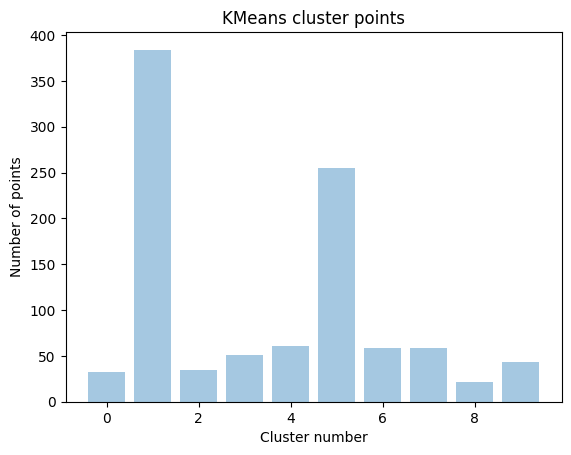

In [18]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf
df1 = cluster_df
df1['Tfidf Clus Label'] = model_tf.labels_
#k-Means cluster
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [22]:
#DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
# Define the minimum number of points required to form a dense region
minPts = 2 * 100
# Lower bound function to find the 200th nearest neighbor distance
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
# Function to compute the 200th nearest neighbor distance
def computenearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) ** 2)
        if (len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[199]
# training data by splitting the text into sentences
list_of_sent_train = list()
for i in cluster_df["Lower casing"].values:
    list_of_sent_train.append(i.split())
# Train a Word2Vec model on the training data
import gensim
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)
# Convert sentences into vectors using the trained Word2Vec model
sent_vectors = []
count = 1
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words = 1
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

In [24]:
# Compute the 200th nearest neighbor distance for each point in the dataset
twohundrethneigh = []
for val in sent_vectors[:300]:
    twohundrethneigh.append(computenearestneighbour(val, sent_vectors[:300]) )
twohundrethneigh.sort()
# Train the DBSCAN clustering model
model = DBSCAN(eps=5, min_samples=minPts, n_jobs=-1)
model.fit(sent_vectors)
# Assign cluster labels to the data points
cluster_df.loc[:, 'AVG-W2V Clus Label'] = model.labels_

<ipython-input-24-edb010274516>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.loc[:, 'AVG-W2V Clus Label'] = model.labels_


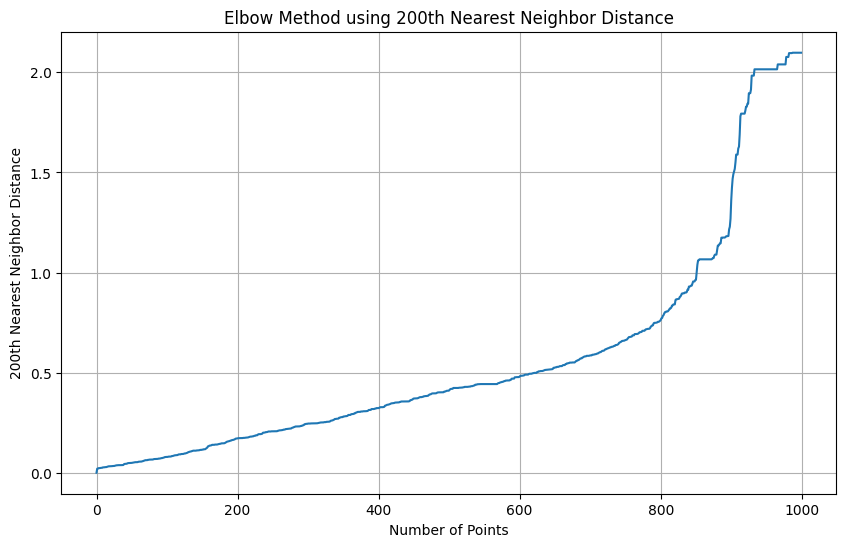

In [25]:
from sklearn.metrics import pairwise_distances
# Calculate pairwise distances between samples in the data
distances = pairwise_distances(sent_vectors)
# Sort the distances in ascending order
sorted_distances = np.sort(distances, axis=0)
# Get the 200th nearest neighbor distance for each point
twohundredth_nearest_distances = sorted_distances[:, 199]
# Plot the elbow method graph using the 200th nearest neighbor distances
plt.figure(figsize=(10, 6))
plt.plot(twohundredth_nearest_distances)
plt.title("Elbow Method using 200th Nearest Neighbor Distance")
plt.xlabel("Number of Points")
plt.ylabel("200th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

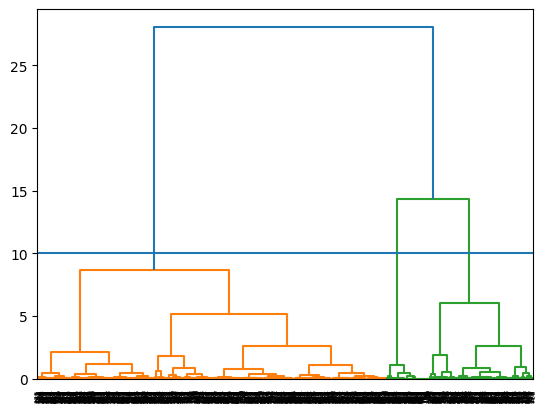

In [26]:
#Hierarchial Clustering
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10)

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




In [28]:
'''
With K Means we can classify the clusters into groups and also we can find the optimum number of clusters.

Next model is Hierarchical clustering is best, but it will be some what difficult to classify the clusters using Hierarchical clustering.

DBScan classifed all the reviews into single cluster which is not fit.
'''

'\nWith K Means we can classify the clusters into groups and also we can find the optimum number of clusters.\n\nNext model is Hierarchical clustering is best, but it will be some what difficult to classify the clusters using Hierarchical clustering.\n\nDBScan classifed all the reviews into single cluster which is not fit.\n'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [27]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:


The exercises offered practical experience in preparing text data, implementing NLP models like Word2Vec and BERT, and evaluating model performance. Dividing the code into functions enhanced clarity, while assessing models with metrics like accuracy provided insight into their effectiveness.



'''

'\nPlease write you answer here:\n\n\nThe exercises offered practical experience in preparing text data, implementing NLP models like Word2Vec and BERT, and evaluating model performance. Dividing the code into functions enhanced clarity, while assessing models with metrics like accuracy provided insight into their effectiveness.\n\n\n\n'